# Цифровая обработка сигналов - Лекция 13

# Тема: Мел-шкала и мел-спектрограмма

## Введение

Перед вами обучающий материал по основам **цифровой обработки сигналов** с использованием средств языка программирования Python. Предполагается, что читатель имеет базовые знания из области высшей математики, а также владеет языком Python и хотя бы поверхностно знает различные python-библиотеки - numpy/scipy, matplotlib и другие. 

Для пользователей MATLAB / GNU Octave освоение материала с точки зрения программного кода не составит труда, поскольку основные функции и их атрибуты во многом идентичны и схожи с методами из python-библиотек.


## Восприятие высоты звука

Высота звука тесно связана с его частотой, но не всегда эквивалентна ей. Дело в том, что в жизни мы имеем дело со сложными, составными сигналами, в которых одновременно присутствует несколько осциллирующих компонент с разной частотой. Высотой звука называется частота его **основного тона**, то есть периодической составляющей с самой низкой частотой в сигнале.

Было замечено, что люди воспринимают высоту звука *нелинейно*: на низких частотах разница в высоте звука ощущается более ясно, чем на высоких. Продемонстрируем это на примере.

## Психоакустический эксперимент

Прослушаем несколько аудиосигналов с разной высотой: 
- две низкие ноты

`Ля второй октавы = 110 Hz
Соль-диез третьей октавы = 207 Hz`

- и две высокие ноты

`Соль шестой октавы =  1568 Hz
Соль-диез шестой октавы = 1661 Hz`

In [10]:
from IPython.display import Audio

### Низкие ноты:

In [11]:
sr = 10000
duration = 1
f1 = 110
f2 = 207

# Generating sinusoids with certain frequencies (pure tones)
A2 = np.sin(2 * np.pi * f1 * np.arange(sr * duration) / sr)
Gis3 = np.sin(2 * np.pi * f2 * np.arange(sr * duration) / sr)

print('Ля 2 октавы (110 Гц):')
display(Audio(A2, rate=sr))
print('Соль-диез 3 октавы (207 Гц):')
display(Audio(Gis3, rate=sr))

Ля 2 октавы (110 Гц):


Соль-диез 3 октавы (207 Гц):


### Высокие ноты:

In [15]:
f3 = 1568
f4 = 1661
G6 = np.sin(2 * np.pi * f3 * np.arange(sr * duration) / sr)
Gis6 = np.sin(2 * np.pi * f4 * np.arange(sr * duration) / sr)

print('Соль 6 октавы (1568 Гц):')
display(Audio(G6, rate=sr))
print('Соль-диез 6 октавы (1661 Гц):')
display(Audio(Gis6, rate=sr))

Соль 6 октавы (1568 Гц):


Соль-диез 6 октавы (1661 Гц):


Хотя разница в частотах для первой и второй пары нот примерно одинакова (~100 Гц), легко услышать, что воспринимается она совершенно по-разному. *Кажется, будто интервал между первыми двумя нотами значительно больше*, чем между вторыми двумя.

Следовательно, обычная линейная шкала частот является неинформативной для отображения восприятия звука человеческим ухом. На самом деле шкала психоакустического восприятия звука человеком является *логарифмической*. Как отобразить частоты в соответствии с тем, как их воспринимает человек, чтобы одинаковое расстояние между делениями шкалы обозначало одинаковое восприятие человеческим ухом? 

Существуют несколько подходов для решения этой задачи. Рассмотрим следующие специальные единицы высоты звука - Барк и Мел.

## Единица высоты звука Барк

**Барк** (по фамилии ученого Генриха Георга Баркгаузена) - психофизическая единица высоты звука, связанная с критическими полосами слуха. 

Человеческий слух раскладывает сигнал на определенные частотные группы, называемые **критическими полосами слуха**. Ушная улитка, орган, отвечающий за распознавание звуков, может быть описана как банк слуховых фильтров, полосы пропускания которых соответствуют критическим полосам. То есть в восприятии человеком сигнал как бы становится диксретным, состоящих из конечного количества компонент, равных количеству критических полос. В диапазоне от 20 до 16 000 Гц число критических полос равно 24, поэтому Барк-шкала обычно содержит от 1 до 24 Барков.

Именно из-за существования критических полос слуха возникает так называемый **эффект маскировки**: в тихой комнате мы можем услышать тиканье часов, в то время как в шумном помещени можем не услышать даже громкий звук наподобие звонка телефона. Звуки, попадающие в одну критическую полосу, как бы накладывается друг на друга, *маскируют* друг друга, поэтому в условиях посторонних шумов порог слышимости повышается.

Рассчитать высоту звука в Барках $b$ через высоту в Герцах $f$ можно по следующей формуле:
$$ b = 13arctg(\frac{0.76f}{1000}) + 3.5arctg((\frac{f}{7500})^2) \tag{13.1}$$

Визуализируем график соотношения частоты в Герцах к частоте в Мелах.

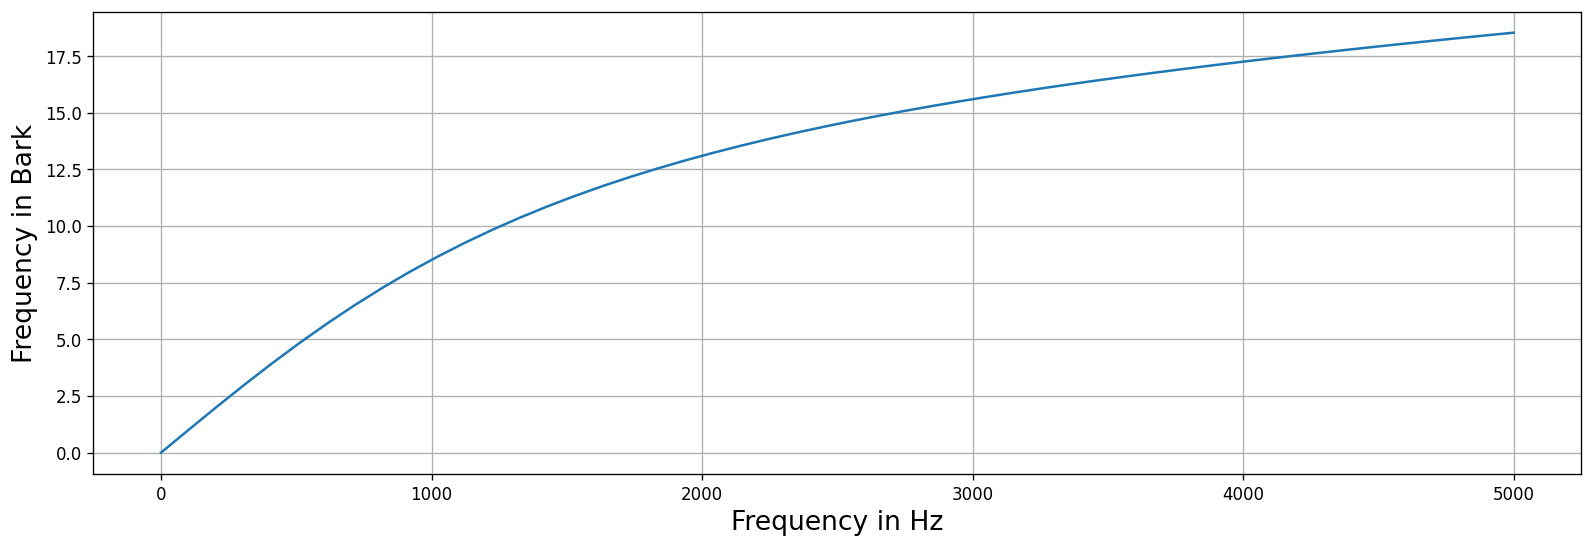

In [6]:
hz = np.linspace(0, 5000)
mel = 13 * np.arctan((0.76 * hz)/1000) + 3.5 * np.arctan((hz/7500)**2)
fig, ax = plt.subplots(figsize=(16, 5), dpi=120)
ax.plot(hz, mel)
ax.grid()
plt.xlabel('Frequency in Hz', fontsize=16)
plt.ylabel('Frequency in Bark', fontsize=16)
plt.show()

## Единица высоты звука Мел

**Мел** (от слова мелодия) - это психофизическая единица высоты звука. Мел-шкала и формула перехода от Герц к мелам были выведены эмпирически, посредством проведения большого количества психоакустических тестов наподобие представленного выше.

Формула перехода от частоты в Герцах до частоты в Мелах:
$$ m = 2595 \cdot \log{(1 + \frac{f}{700})}\tag{13.2}$$
Функция обратного перехода от Мелов к Герцам:
$$ f = 700\cdot(10^{\frac{m}{2595}} - 1) \tag{13.3}$$

Рассмотрим, как выглядит график соотношения частоты в Герцах к частоте в Мелах.

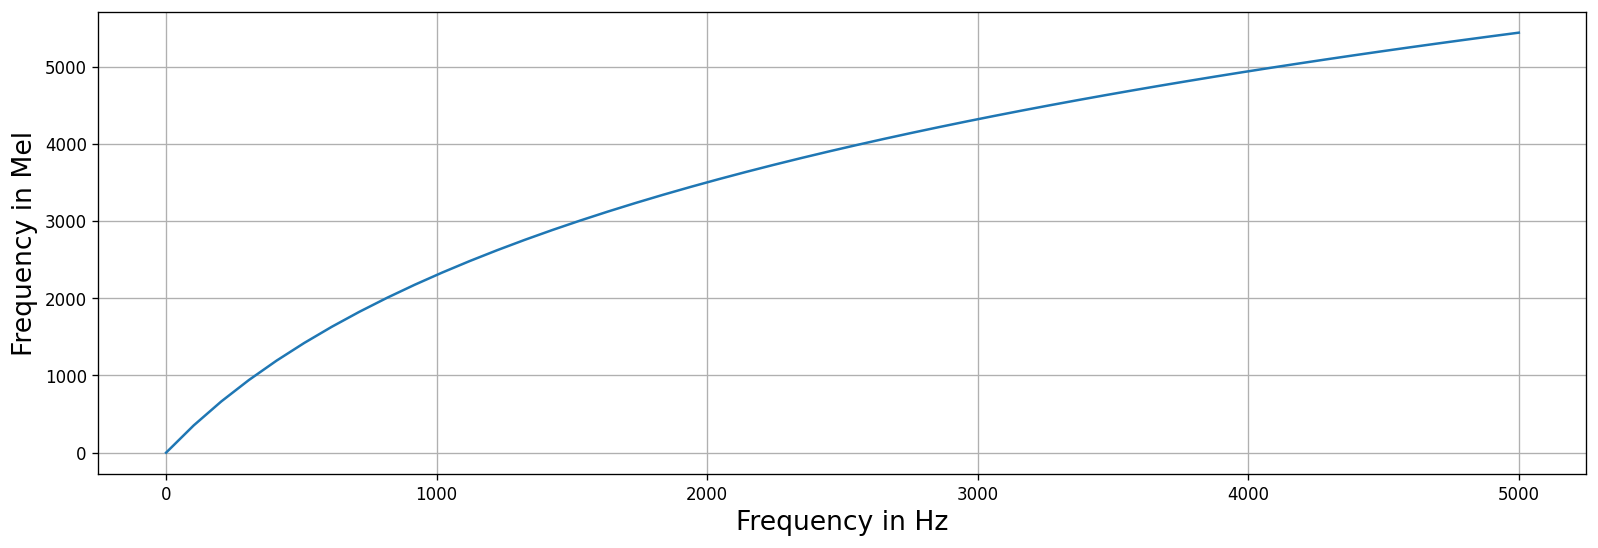

In [16]:
hz = np.linspace(0, 5000)
mel = 2595 * np.log(1 + hz/700)
fig, ax = plt.subplots(figsize=(16, 5), dpi=120)
ax.plot(hz, mel)
ax.grid()
plt.xlabel('Frequency in Hz', fontsize=16)
plt.ylabel('Frequency in Mel', fontsize=16)
plt.show()

Мел-шкала повсеместно используется в задачах анализа звука, так как она применяется для создания мел-спектрограммы и мел-кепстральных частотных коэффициентов, которые будут представлены в следующей лекции.

Однако прежде чем идти дальше, необходимо ввести еще один важный термин - спектрограмма.

## Спектрограмма

В лекции 2 [Преобразование Фурье: Амлитудный и фазовый спектр](https://nbviewer.org/github/hukenovs/dsp-theory/blob/master/src/dsp_theory_2_spectrum.ipynb) мы рассмотрели прямое преобразование Фурье и метод быстрого преобразования Фурье. Сейчас мы разберем еще одно важное преобразование - оконное преобразование Фурье.

**Оконное преобразование Фурье** (Short-Time Fourier Transfrom, STFT) - это разновидность преобразования Фурье с использование оконной функции. Оконное преобразование позволяет получить информацию о том, какие частоты *в какой момент времени* присутствуют в сигнале.

Иногда это преобразование также обозначается как *STFFT (Short-Time **Fast** Fourier Transform)*, так как на практике для его реализации используется именно быстрое преобразование Фурье. Быстрое преобразование Фурье применяется локально к небольшим сегментами сигнала. 

Чтобы получить отдельные сегменты сигнала, исходный сигнал перемножается с оконной функцией:
$$x_w(t) = x(t) \cdot w(t) \tag{13.4}$$
где $x(t)$ это исходный сигнал, а $w(t)$ - оконная функция. 

*Подробнее оконные функции рассмотрены в лекции 7: [Оконная фильтрация сигналов](https://nbviewer.org/github/hukenovs/dsp-theory/blob/master/src/dsp_theory_7_windows.ipynb)*

Таким образом, если мы поделили сигнал с помощью оконной функции на $m$ сегментов, мы $m$ раз применяем быстрое преобразование Фурье, отдельно для каждого из этих сегментов.

Непрерывное оконное преобразование Фурье определяется следующим образом:
$$ F(\tau, \omega) = \int\limits_{-\infty}^\infty f(\tau) W(t - \tau) e^{-j\omega\tau}\mathrm{d\tau} \tag{13.5}$$
Здесь $W(t - \tau)$ - некоторая оконная функция.

Дискретное оконное преобразование Фурье описывается аналогично.
$$F(m, \omega) = \sum_{n=-\infty}^{\infty}x_n w_{n - m}e^{-j\omega n} \tag{13.6}$$

Оконное преобразование Фурье позволяет получить важно представление сигнала -  *спектрограмму*.

**Спектрограмма** - это график, показывающий зависимость плотности мощности сигнала от времени и частоты:

$$ E(\tau, \omega) = |F(\tau, \omega)|^2 \tag{13.7}$$

где $F(\tau, \omega)$ - оконное преобразование Фурье.

Для примера визуализируем спектрограмму сигнала с *линейной частотной модуляцией (ЛЧМ)*, частота которого изменяется линейно от 1 до 400 Гц.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

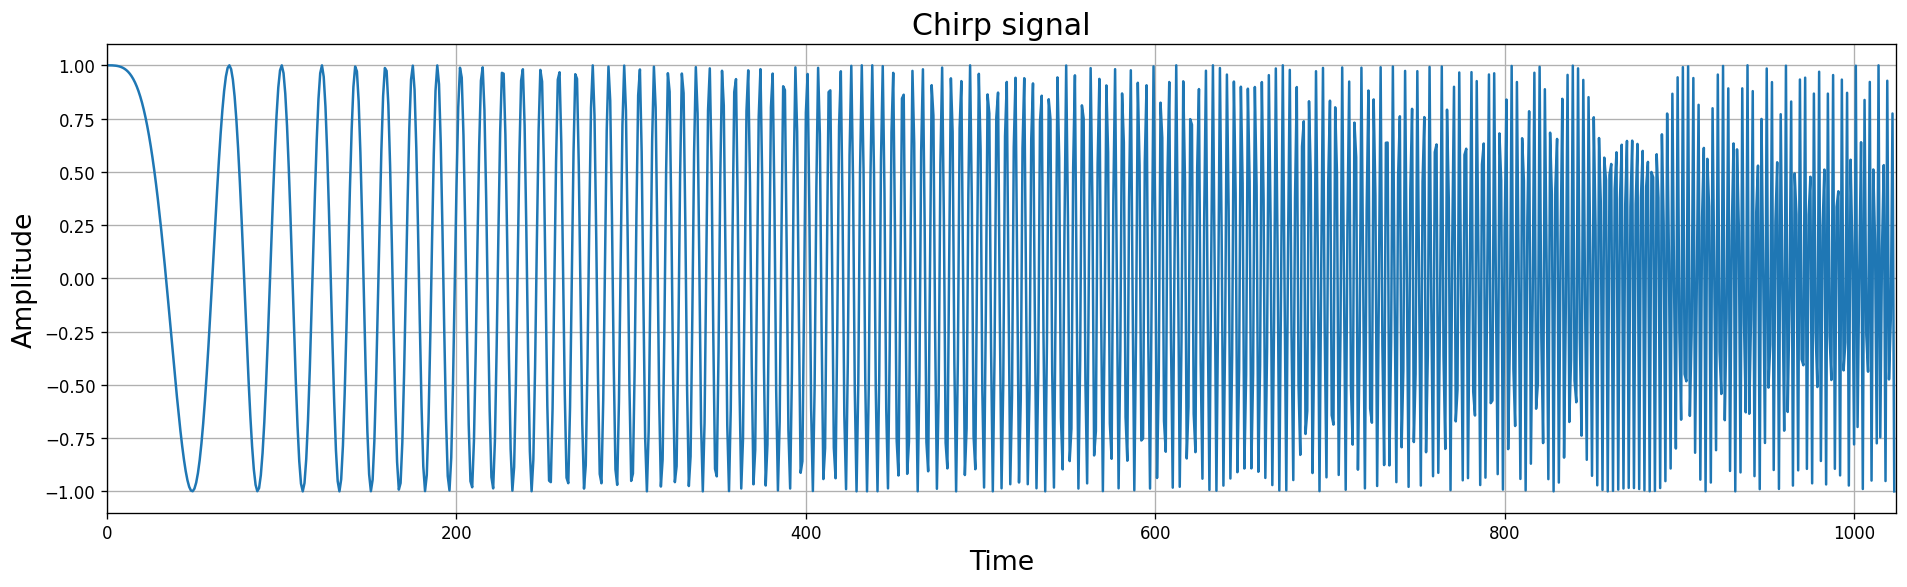

In [3]:
from scipy.signal import chirp

N = 1024
time = np.linspace(0, 1, N)
chirp_sig = chirp(time, f0=1, t1=1, f1=400)

fig = plt.figure(figsize=(16, 5), dpi=120) 
plt.title("Chirp signal", fontsize=18)
plt.plot(chirp_sig)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.grid()
plt.xlim(0, N)
plt.tight_layout()

Для получения изображения спектрограммы можно использовать встроенную matplotlib функцию specgram. Функция не только считает коэффициенты оконного преобразования Фурье для заданного сигнала, но и автоматически строит график.

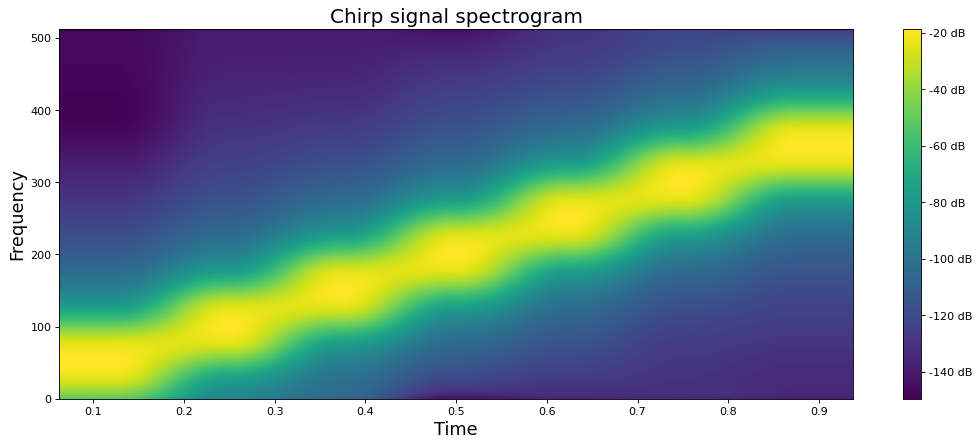

In [4]:
fig = plt.figure(figsize=(16, 6), dpi=80)
plt.specgram(chirp_sig, Fs=N)
plt.colorbar(format='%+2.0f dB');
plt.title('Chirp signal spectrogram', fontsize=18)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

## Мел-спектрограмма

Мел-спектрограмма похожа на обычную спектрограмму с одним изменением - вместо частотной шкалы в Герцах используется мел-шкала.
Алгоритм вычисления мел-спектрограммы следующий:
1. Применить к сигналу оконное преобразование Фурье.
2. Преобразовать амплитуду в децибелы. Дело в том, что восприятие человеком громкости звука *тоже нелинейно*: ощущение громкости пропорционально логарифму интенсивности звука, поэтому шкала в децибелах оказывается более информативной.
3. Преобразовать частоту в мелы, применив к спектрограмме банк мел-фильтров.

**Банк мел-фильтров** можно построить следующим образом:
1. Перевести максимальную и минимальную частоту в мелы.
2. Создать $n$ равномерно расположенных точек (каждая точка - середина соответствующей мел-полосы).
3. Преобразовать соответствующее значение частоты каждой точки обратно в Герцы и округлить до ближайшего отсчета частоты.
4. На полученных частотных полосах построить треугольные фильтры.

Построим банк мел-фильтров, используя Python библиотеку для работы с аудиосигналами - `librosa`. В этой библиотеке представлено много инструментов для обработки и анализа звука, включая банк мел-фильтров `filters.mel`, позволяющий получать мел-спектрограмму сигнала.

In [17]:
import librosa
import librosa.display

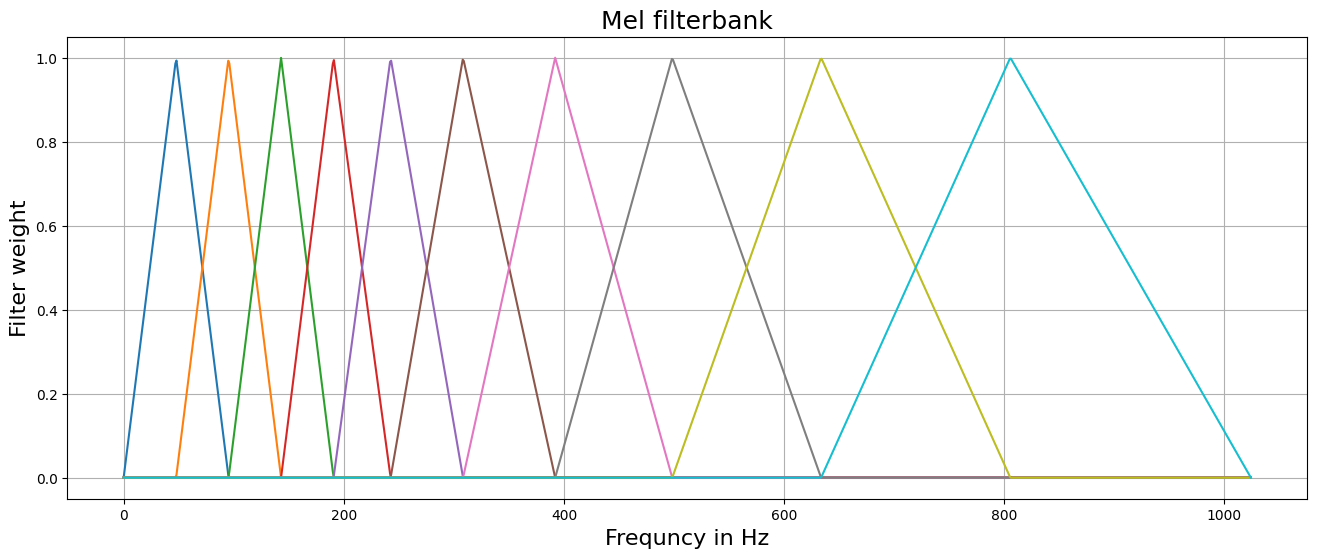

In [18]:
n_mel_bands = 10

# Calculate filterbank coefficients
fig, ax = plt.subplots(figsize=(16, 6))
mels = librosa.filters.mel(
    n_fft=2048, sr=10000, 
    n_mels=n_mel_bands, fmin=0.0, 
    fmax=None, htk=False, 
    norm=None
)
mels = mels.T

ax.plot(mels)
ax.grid()
plt.title('Mel filterbank', fontsize=18)
plt.xlabel('Frequncy in Hz', fontsize=16)
plt.ylabel('Filter weight', fontsize=16)
plt.show()

На графике выше представлено 10 треугольных мел-фильтров для 10 различных частотных полос; по оси $X$ отложена частота в Герцах, по оси $Y$ - вес фильтра в диапазоне от 0 до 1. Как можно заметить, фильтры пересекаются, левая и правая границы каждой частотной полосы (каждого треугольника) являются центрами предыдущей и следующей полос соответственно. Для каждой полосы на середине коэффициент пропускания будет максимальным (вес фильтра равен 1), а на граничных значения, соответственно, минимальным (вес равен 0).

Теперь построим мел-спектрограмму аудиосигнала.

In [19]:
# Download an example file
audio, sr = librosa.load(librosa.util.example('trumpet'))
print('Trumpet solo')
Audio(audio, rate=sr)

Trumpet solo


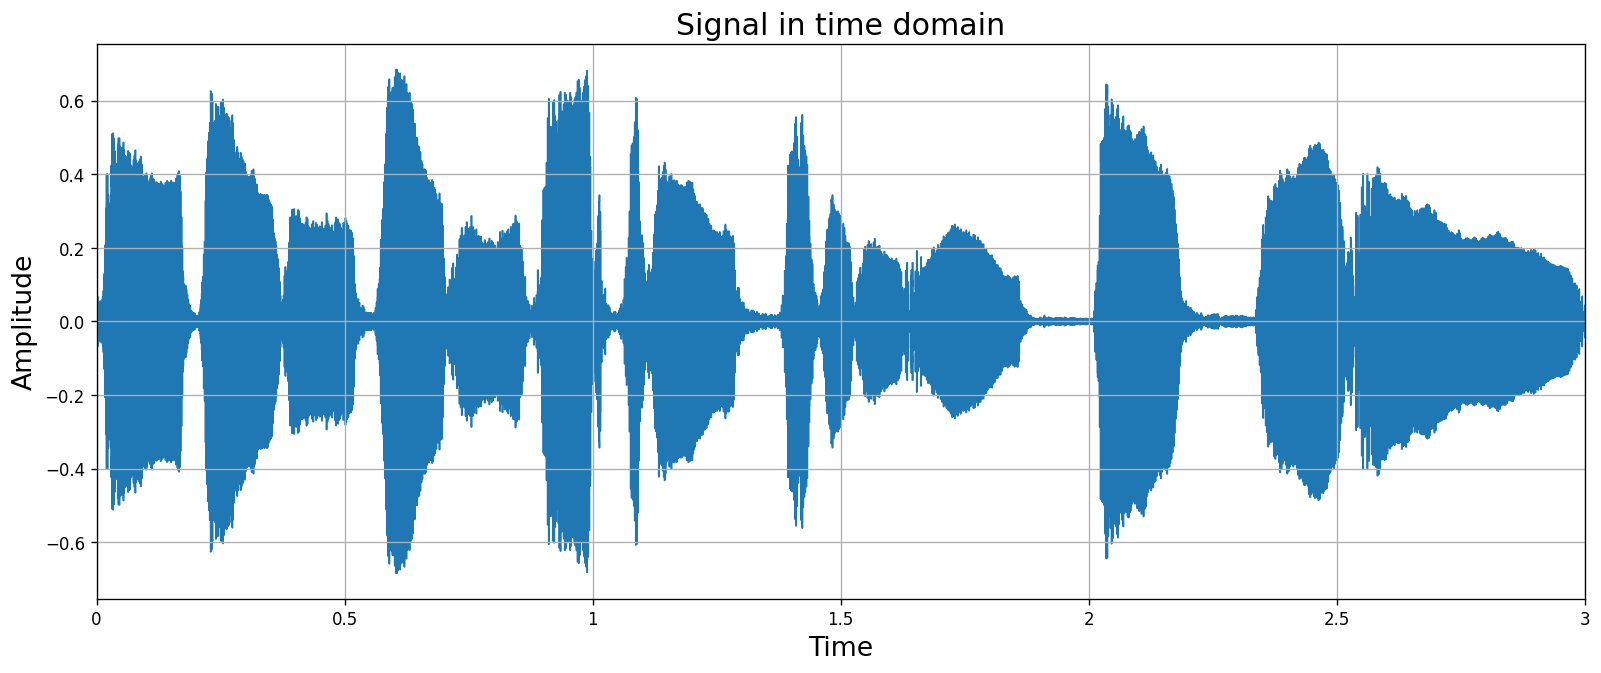

In [21]:
plt.figure(figsize=(16, 6), dpi=120)
plt.title('Signal in time domain', fontsize=18)
librosa.display.waveshow(audio, sr=sr)
plt.xlim((0, 3))
plt.xlabel('Time', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.grid()

Метод `feature.melspectrogram` позволяет автоматически вычислить мел-спектрограмму сигнала с заданными параметрами без необходимости применять банк мел-фильтров к спектрограмме сигнала вручную.

In [23]:
mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=8192, n_mels=90)

Так как восприятие амплитуды также является логарифмическим, для большей информативности следует перевести амплитуду в децибелы и получить *логарифмическую мел-спектрограмму*. Для этого в librosa есть метод `power_to_db`.

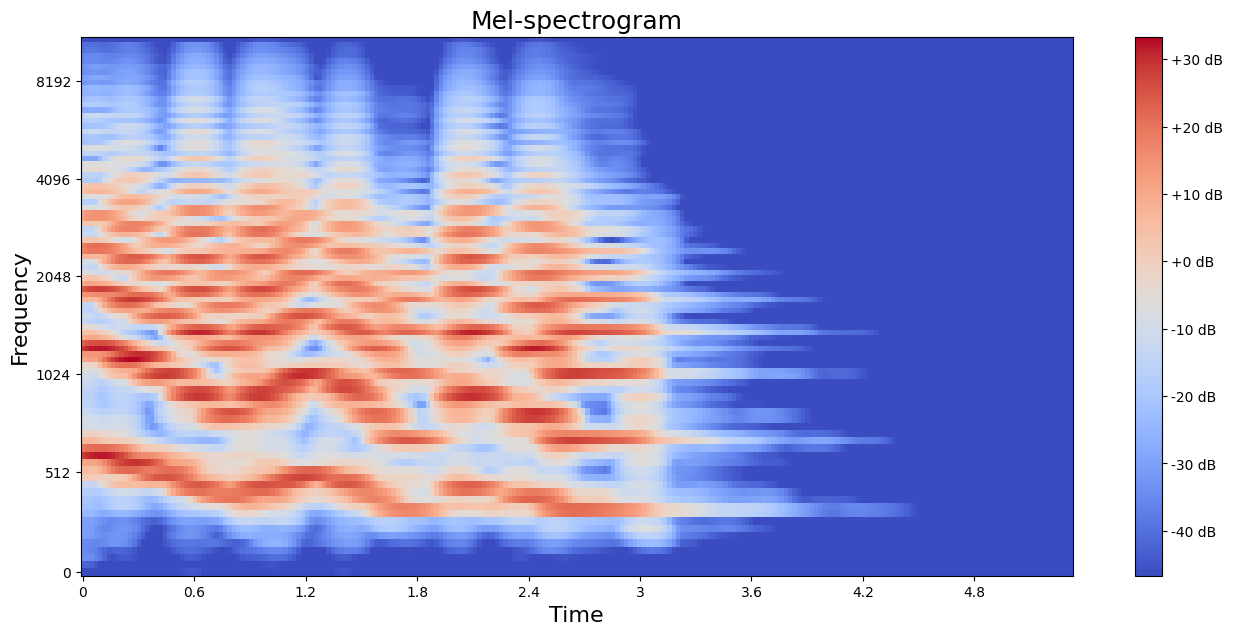

In [24]:
log_mel_spec = librosa.power_to_db(mel_spectrogram)

# Plot mel-spectrogram
plt.figure(figsize=(16, 7))
librosa.display.specshow(
    log_mel_spec,
    x_axis='time',
    y_axis='mel',
    sr=sr
)
plt.colorbar(format='%+2.0f dB');
plt.title('Mel-spectrogram', fontsize=18)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

___